In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

#for one hot encoding
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

sns.set(style = "dark", context= "notebook", palette="deep")

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [4]:
train = pd.read_csv("../input/digit-recognizer/train.csv")
test = pd.read_csv("../input/digit-recognizer/test.csv")

In [5]:
y_train = train["label"].copy()
train = train.drop("label", axis = 1)

train = train/255
test = test/255

train = train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

from sklearn.model_selection import train_test_split
#splitting data for training and validation
X_train, X_val, y_train, y_val = train_test_split(train, y_train, test_size = 0.1, random_state = 2)

In [6]:
y_train = to_categorical(y_train, num_classes=10)
y_train.shape

(37800, 10)

In [22]:
y_val = to_categorical(y_val, num_classes=10)
y_val.shape

(4200, 10)

In [7]:
X_train.shape

(37800, 28, 28, 1)

In [8]:
X_val.shape

(4200, 28, 28, 1)

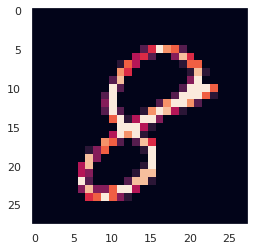

In [9]:
g = plt.imshow(X_train[0][:,:,0])

In [10]:
# CNN model

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = "same",
                activation = "relu", input_shape =(28, 28, 1)))
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding ="same",
                activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = "same",
                activation = "relu"))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [43]:
optimizer = RMSprop(learning_rate=0.001, rho= 0.9, epsilon = 1e-08, decay = 0.0)

In [44]:
model.compile(optimizer= optimizer, loss= "categorical_crossentropy", metrics=["accuracy"])

In [13]:
batch = 100

In [62]:
ReduceLROnPlateau?

In [55]:
learning_rate_decline = ReduceLROnPlateau(monitor= "val_accuracy",factor = .33 ,verbose = 1,patience = 3)

In [56]:
history = model.fit(X_train, y_train, epochs = 12, verbose = 1,batch_size=batch, validation_data=(X_val, y_val), 
                    callbacks=[learning_rate_decline])

Epoch 1/12
378/378 [==============================] - 3s 8ms/step - loss: 0.2224 - accuracy: 0.9873 - val_loss: 0.0392 - val_accuracy: 0.9931 - lr: 3.9063e-06
Epoch 2/12
378/378 [==============================] - 3s 8ms/step - loss: 0.0633 - accuracy: 0.9921 - val_loss: 0.0266 - val_accuracy: 0.9936 - lr: 3.9063e-06
Epoch 3/12
378/378 [==============================] - 4s 10ms/step - loss: 0.0360 - accuracy: 0.9931 - val_loss: 0.0238 - val_accuracy: 0.9938 - lr: 3.9063e-06
Epoch 4/12
378/378 [==============================] - 3s 8ms/step - loss: 0.0339 - accuracy: 0.9935 - val_loss: 0.0228 - val_accuracy: 0.9940 - lr: 3.9063e-06
Epoch 5/12
378/378 [==============================] - 3s 8ms/step - loss: 0.0292 - accuracy: 0.9938 - val_loss: 0.0220 - val_accuracy: 0.9936 - lr: 3.9063e-06
Epoch 6/12
378/378 [==============================] - 3s 8ms/step - loss: 0.0207 - accuracy: 0.9943 - val_loss: 0.0215 - val_accuracy: 0.9940 - lr: 3.9063e-06
Epoch 7/12
378/378 [=========================

In [46]:
digit_augmentation = ImageDataGenerator?

In [47]:
digit_augmentation = ImageDataGenerator(
                            rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            brightness_range=None,
                            shear_range=0.0,
                            zoom_range=0.1,
                            horizontal_flip=False,
                            vertical_flip=False,
                            validation_split=0.0,
                            dtype=None)

In [50]:
new = model.fit_generator(
    digit_augmentation.flow(X_train, y_train, batch_size = batch),
    steps_per_epoch= X_train.shape[0]//batch,
    epochs=30,
    verbose=1,
    callbacks=[learning_rate_decline],
    validation_data=(X_val, y_val))

Epoch 1/30
378/378 [==============================] - 13s 35ms/step - loss: 0.0797 - accuracy: 0.9792 - val_loss: 0.0279 - val_accuracy: 0.9929 - lr: 0.0010
Epoch 2/30
378/378 [==============================] - 13s 35ms/step - loss: 0.0781 - accuracy: 0.9798 - val_loss: 0.0683 - val_accuracy: 0.9902 - lr: 0.0010
Epoch 3/30
378/378 [==============================] - 13s 36ms/step - loss: 0.0780 - accuracy: 0.9799 - val_loss: 0.0356 - val_accuracy: 0.9936 - lr: 0.0010
Epoch 4/30
378/378 [==============================] - 15s 39ms/step - loss: 0.0802 - accuracy: 0.9797 - val_loss: 0.0263 - val_accuracy: 0.9933 - lr: 0.0010
Epoch 5/30
378/378 [==============================] - 13s 35ms/step - loss: 0.0782 - accuracy: 0.9797 - val_loss: 0.0467 - val_accuracy: 0.9910 - lr: 0.0010
Epoch 6/30
378/378 [==============================] - 14s 36ms/step - loss: 0.0769 - accuracy: 0.9813 - val_loss: 0.0475 - val_accuracy: 0.9945 - lr: 0.0010
Epoch 7/30
378/378 [==============================] - ETA:

In [57]:
pred = model.predict(test)

In [58]:
sub = pd.DataFrame()
sub["ImageId"] = np.arange(1, len(pred)+1)
sub["Label"] = np.dot(np.round(pred),np.arange(0,10))

In [59]:
sub["Label"] = sub["Label"].astype(int)

In [60]:
sub.to_csv("sub.csv", index = None)